<a href="https://colab.research.google.com/github/marcus2348532/2348532_AML/blob/main/2348532_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/data - data.csv")

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

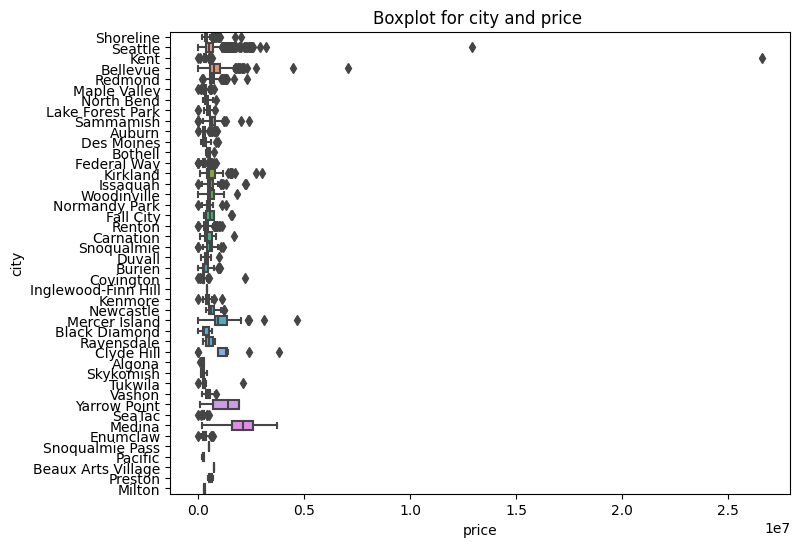

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='city', data=df)
plt.title('Boxplot for city and price ')
plt.show()


In [10]:
correlation_matrix = df.corr()

print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

<ipython-input-10-e57d5babc17b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


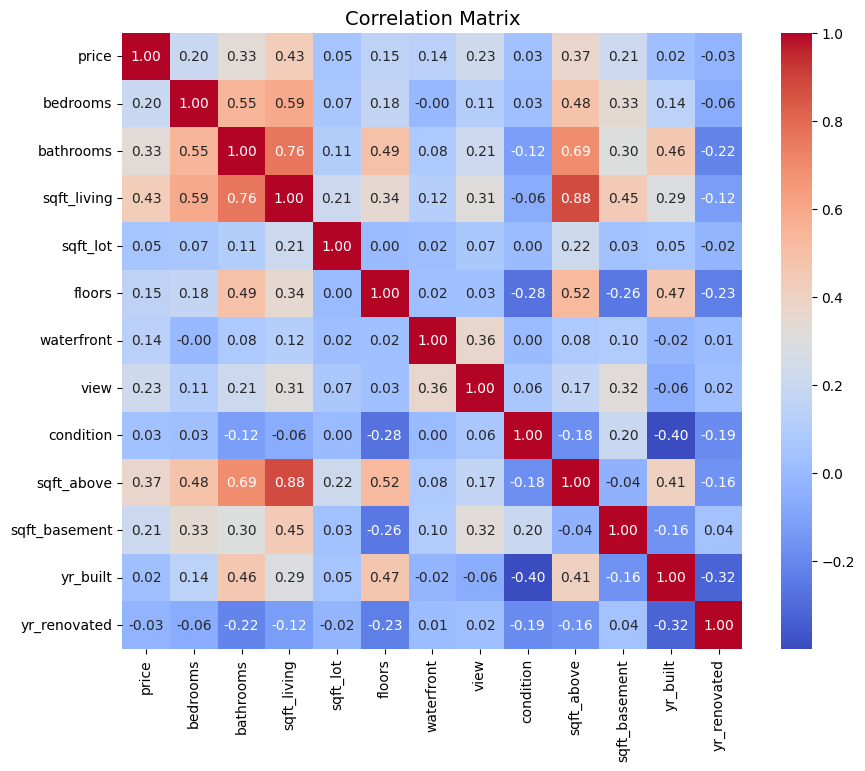

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [12]:
print(max (df['yr_built']))
print(min (df['yr_built']))


2014
1900


BINNING

In [13]:
import pandas as pd

bin_edges = [1900, 1920, 1940, 1960, 1980, 2000, 2020]

bin_labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

df['year_built_bins'] = pd.cut(df['yr_built'], bins=bin_edges, labels=bin_labels)

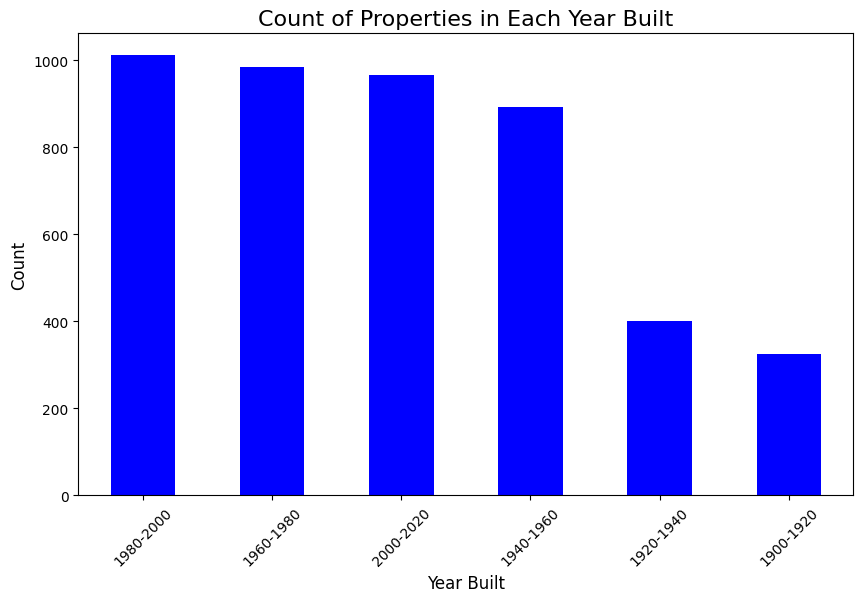

In [14]:

bin_counts = df['year_built_bins'].value_counts()


plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='blue')
plt.title('Count of Properties in Each Year Built', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [28]:

df['SqftAboveBins'] = pd.qcut(df['sqft_above'], q=5, labels=False)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin,YearBuiltBins,SqftAboveBins
0,02-05-2014 0:00,-0.423817,-0.441074,-0.843112,-0.829881,-0.193413,-0.022414,-0.084995,-0.309161,-0.667040,...,-0.530956,1.221538,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House,2,1
1,02-05-2014 0:00,3.249245,1.759513,0.432754,1.568358,-0.161700,0.906456,-0.084995,4.829554,2.286168,...,-1.674511,-0.825604,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN,0,4
2,02-05-2014 0:00,-0.372384,-0.441074,-0.205179,-0.217344,-0.080969,-0.951284,-0.084995,-0.309161,0.809564,...,-0.160982,-0.825604,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House,2,3
3,02-05-2014 0:00,-0.234046,-0.441074,0.113788,-0.144670,-0.190125,-0.951284,-0.084995,-0.309161,0.809564,...,-0.261884,-0.825604,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN,2,0
4,02-05-2014 0:00,-0.003481,0.659220,0.432754,-0.206962,-0.121293,-0.951284,-0.084995,-0.309161,0.809564,...,0.175357,1.208264,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,-0.432390,-0.441074,-0.524145,-0.653387,-0.236663,-0.951284,-0.084995,-0.309161,0.809564,...,-0.564590,1.194991,501 N 143rd St,Seattle,WA 98133,USA,1940-1960,Relatively Small House,2,2
4596,09-07-2014 0:00,-0.031267,-0.441074,0.432754,-0.705297,-0.202860,0.906456,-0.084995,-0.309161,-0.667040,...,0.410795,1.225622,14855 SE 10th Pl,Bellevue,WA 98007,USA,1980-2000,Relatively Small House,3,2
4597,09-07-2014 0:00,-0.239536,-0.441074,0.432754,0.903911,-0.218438,0.906456,-0.084995,-0.309161,-0.667040,...,1.285278,-0.825604,759 Ilwaco Pl NE,Renton,WA 98059,USA,2000-2020,NaN,4,4
4598,10-07-2014 0:00,-0.618201,0.659220,-0.205179,-0.051232,-0.229139,-0.951284,-0.084995,-0.309161,-0.667040,...,0.108089,-0.825604,5148 S Creston St,Seattle,WA 98178,USA,1960-1980,NaN,3,0


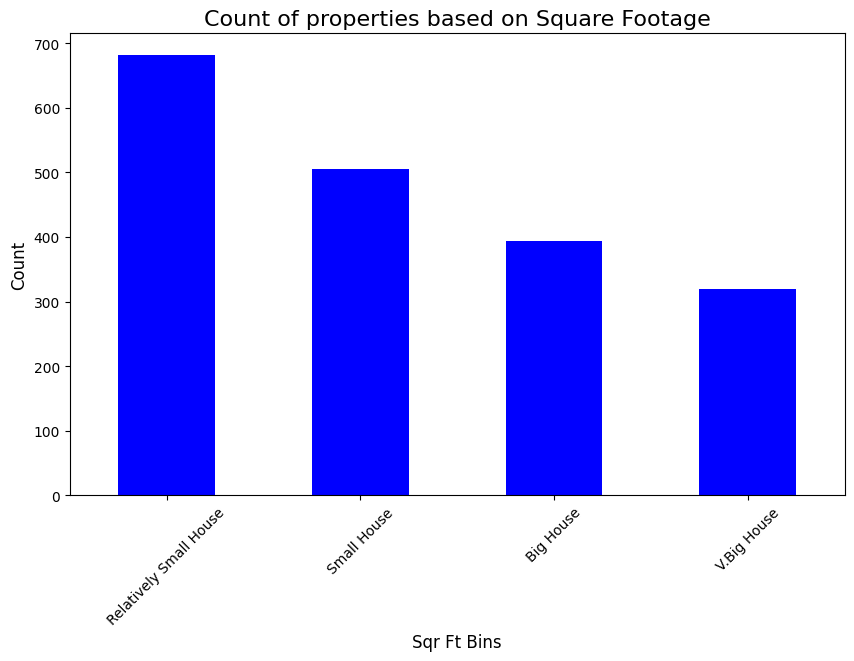

In [32]:

bin_counts = df['sqft_above_bin'].value_counts()
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='blue')
plt.title('Count of properties based on Square Footage', fontsize=16)
plt.xlabel('Sqr Ft Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Identify and normalize all the attributes that has numerical values.

In [17]:
import pandas as pd
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin
0,02-05-2014 0:00,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House
1,02-05-2014 0:00,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN
2,02-05-2014 0:00,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House
3,02-05-2014 0:00,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN
4,02-05-2014 0:00,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,501 N 143rd St,Seattle,WA 98133,USA,1940-1960,Relatively Small House
4596,09-07-2014 0:00,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,14855 SE 10th Pl,Bellevue,WA 98007,USA,1980-2000,Relatively Small House
4597,09-07-2014 0:00,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,759 Ilwaco Pl NE,Renton,WA 98059,USA,2000-2020,NaN
4598,10-07-2014 0:00,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,5148 S Creston St,Seattle,WA 98178,USA,1960-1980,NaN


 Visualize all the processed attributes and provide suitable inference

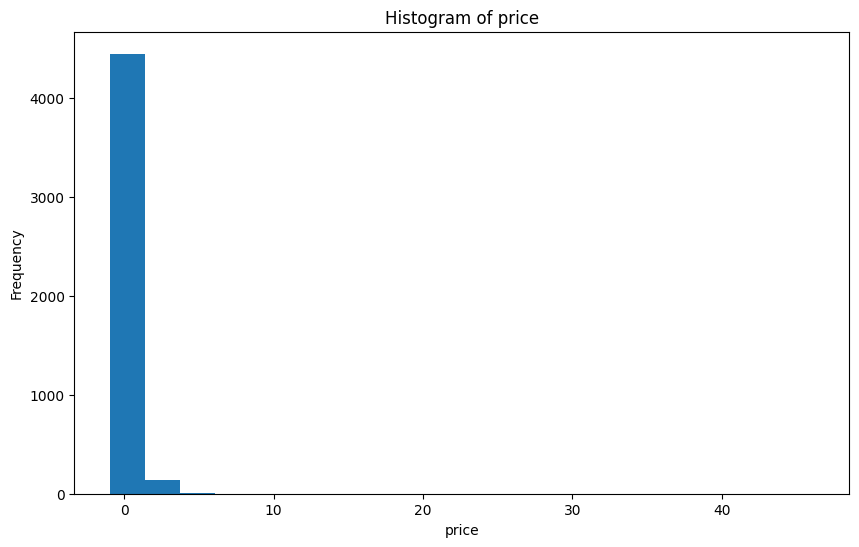

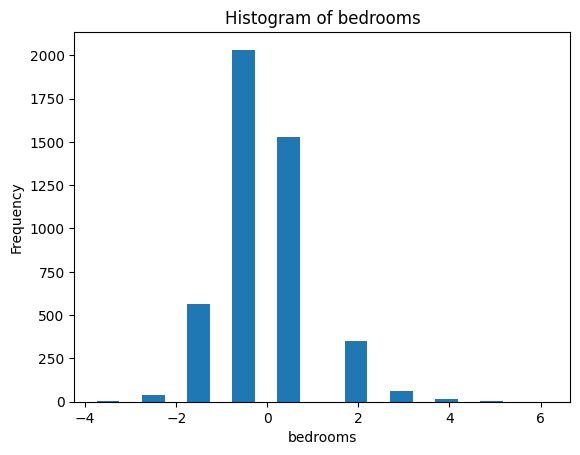

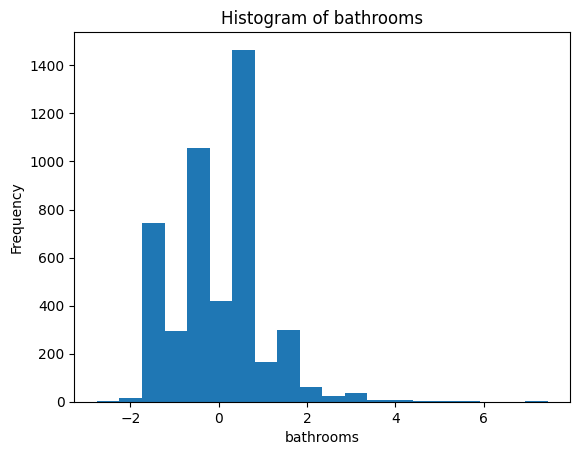

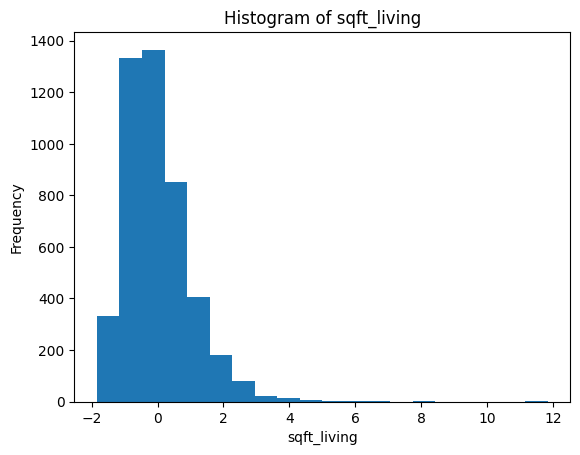

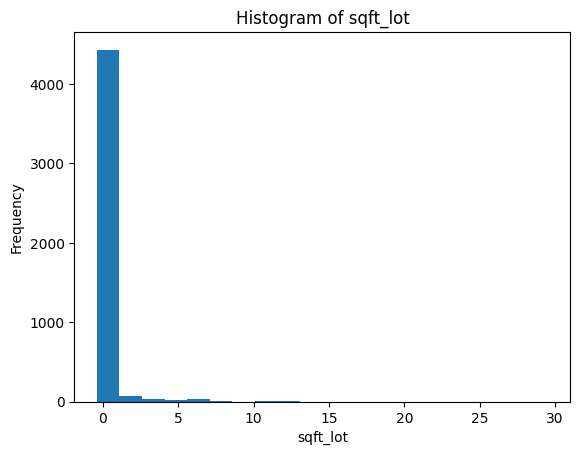

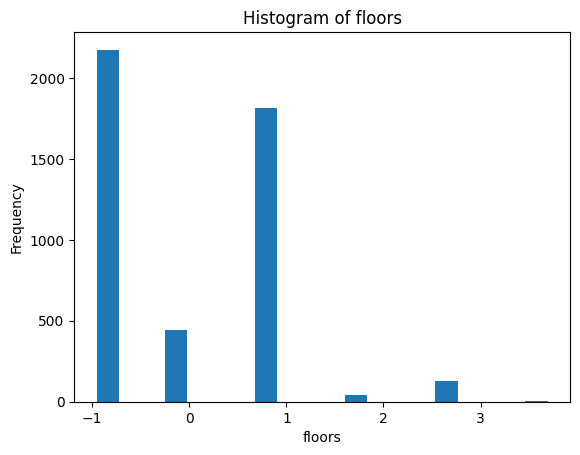

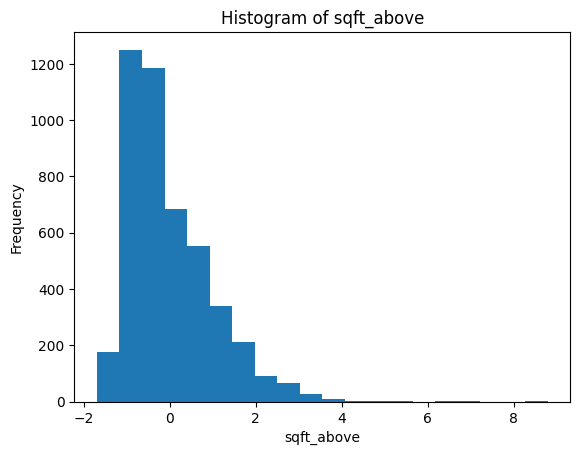

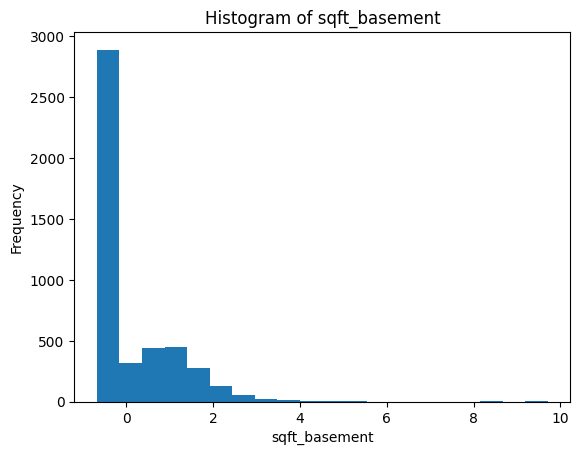

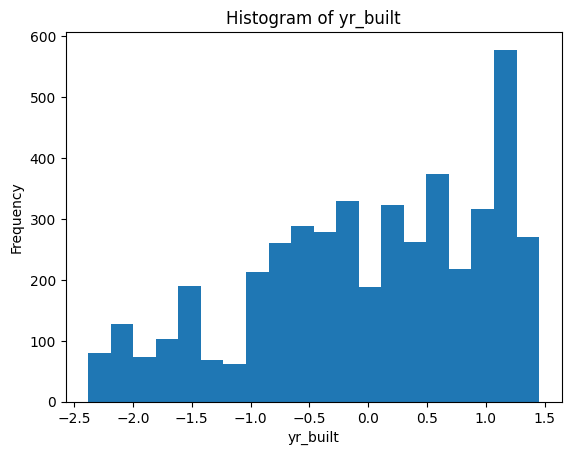

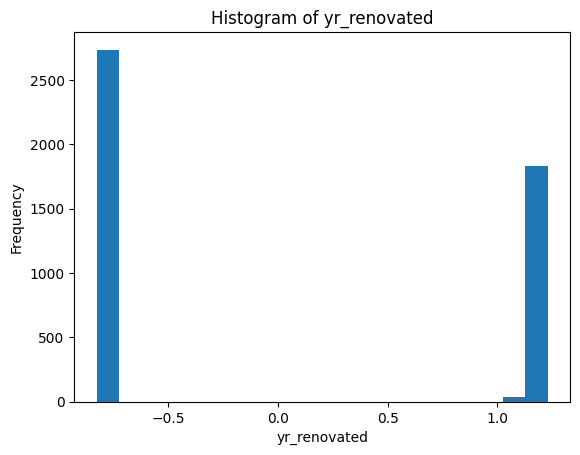

In [33]:
plt.figure(figsize=(10, 6))
for col in numerical_columns:
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Z-score normalization

In [20]:
df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin
0,02-05-2014 0:00,-0.423817,-0.441074,-0.843112,-0.829881,-0.193413,-0.022414,-0.084995,-0.309161,-0.667040,-0.565162,-0.672391,-0.530956,1.221538,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House
1,02-05-2014 0:00,3.249245,1.759513,0.432754,1.568358,-0.161700,0.906456,-0.084995,4.829554,2.286168,1.789365,-0.069121,-1.674511,-0.825604,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN
2,02-05-2014 0:00,-0.372384,-0.441074,-0.205179,-0.217344,-0.080969,-0.951284,-0.084995,-0.309161,0.809564,0.119158,-0.672391,-0.160982,-0.825604,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House
3,02-05-2014 0:00,-0.234046,-0.441074,0.113788,-0.144670,-0.190125,-0.951284,-0.084995,-0.309161,0.809564,-0.959517,1.482145,-0.261884,-0.825604,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN
4,02-05-2014 0:00,-0.003481,0.659220,0.432754,-0.206962,-0.121293,-0.951284,-0.084995,-0.309161,0.809564,-0.797135,1.051238,0.175357,1.208264,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,-0.432390,-0.441074,-0.524145,-0.653387,-0.236663,-0.951284,-0.084995,-0.309161,0.809564,-0.367985,-0.672391,-0.564590,1.194991,501 N 143rd St,Seattle,WA 98133,USA,1940-1960,Relatively Small House
4596,09-07-2014 0:00,-0.031267,-0.441074,0.432754,-0.705297,-0.202860,0.906456,-0.084995,-0.309161,-0.667040,-0.425978,-0.672391,0.410795,1.225622,14855 SE 10th Pl,Bellevue,WA 98007,USA,1980-2000,Relatively Small House
4597,09-07-2014 0:00,-0.239536,-0.441074,0.432754,0.903911,-0.218438,0.906456,-0.084995,-0.309161,-0.667040,1.371813,-0.672391,1.285278,-0.825604,759 Ilwaco Pl NE,Renton,WA 98059,USA,2000-2020,NaN
4598,10-07-2014 0:00,-0.618201,0.659220,-0.205179,-0.051232,-0.229139,-0.951284,-0.084995,-0.309161,-0.667040,-0.878326,1.525235,0.108089,-0.825604,5148 S Creston St,Seattle,WA 98178,USA,1960-1980,NaN


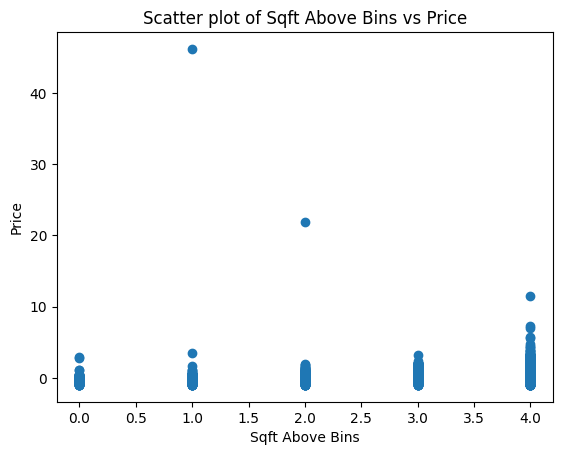

In [34]:
plt.scatter(df['SqftAboveBins'], df['price'])
plt.xlabel('Sqft Above Bins')
plt.ylabel('Price')
plt.title('Scatter plot of Sqft Above Bins vs Price')
plt.show()